In [3]:
import cv2
import numpy as np
import tifffile as tf
import zarr as zarr
import matplotlib.pyplot as plt
import argparse
import colour
from sklearn.cluster import KMeans
import math
from sklearn.cluster import MiniBatchKMeans
from colour import RGB_to_XYZ, SDS_ILLUMINANTS, XYZ_to_Lab, delta_E
from colour.models.rgb import RGB_COLOURSPACES, RGB_to_XYZ
import skimage.color

ModuleNotFoundError: No module named 'sklearn'

In [4]:
pip freeze

anyio==4.2.0Note: you may need to restart the kernel to use updated packages.

argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asciitree==0.3.3
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
colour-science==0.4.4
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
executing==2.0.1
fasteners==0.19
fastjsonschema==2.19.1
fonttools==4.47.2
fqdn==1.5.1
idna==3.6
imagecodecs==2024.1.1
imageio==2.33.1
ipykernel==6.29.0
ipython==8.20.0
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.3
json5==0.9.14
jsonpointer==2.4
jsonschema==4.21.0
jsonschema-specifications==2023.12.1
jupyter-events==0.9.0
jupyter-lsp==2.2.2
jupyter_client==8.6.0
jupyter_core==5.7.1
jupyter_server==2.12.5
jupyter_server_terminals==0.5.1
jupyterlab==4.0.11
jupyterlab_pygments==0.3.0
jupyterlab_server==2.25.2
kiwisolver==1.4.5
lazy_loader==0.3
Mark

In [ ]:
tiff_store = tf.imread("./Calib_Polaris_Scan3.qptiff", aszarr=True)
zarr_store = zarr.open(tiff_store)
zarr_store['/2'].shape[0]/zarr_store['/6'].shape[0] #16

In [21]:
lvl_two=zarr_store['/2']
x1, x2, y1, y2 = 367*16, 488*16, 1202*16, 1416*16
cropped_img=lvl_two[y1:y2, x1:x2, :]

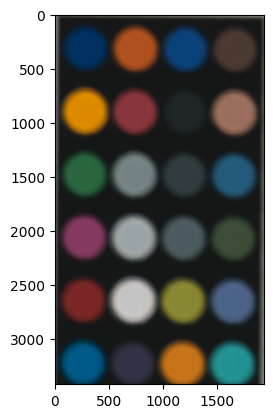

In [23]:
plt.imshow(cropped_img)

In [24]:
#tf.imwrite("./second_lvl.tif", cropped_img)

In [42]:
#img=cv2.imread('second_lvl.tif')
img=cropped_img
output=img.copy()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
#findind circles by applying different settings
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1.3, 200, param2=50, param1=5, minRadius=170, maxRadius=185)
circles 

array([[[  258.05   ,  2657.8499 ,   184.17   ],
        [ 1171.95   ,  2648.75   ,   184.17   ],
        [ 1152.45   ,  3232.45   ,   184.17   ],
        [  294.44998,  2062.45   ,   184.17   ],
        [ 1204.45   ,   290.55   ,   184.17   ],
        [  316.55   ,   892.44995,   184.17   ],
        [  740.35   ,  3219.45   ,   184.17   ],
        [  311.34998,   328.25   ,   184.17   ],
        [  256.75   ,  3225.95   ,   184.17   ],
        [  294.44998,  1473.5499 ,   184.17   ],
        [ 1616.5499 ,  3233.75   ,   184.17   ],
        [ 1641.25   ,  1489.1499 ,   184.17   ],
        [  752.05   ,   900.24994,   182.74   ],
        [ 1204.45   ,  1473.5499 ,   184.17   ],
        [ 1200.5499 ,   914.55   ,   184.17   ],
        [  749.44995,   307.44998,   174.16   ],
        [ 1642.5499 ,   299.65   ,   184.17   ],
        [ 1652.95   ,   922.35   ,   184.17   ],
        [ 1681.5499 ,  2084.5498 ,   184.17   ],
        [  702.64996,  2061.15   ,   184.17   ],
        [  698.75   

In [44]:
#array with coordinates of detected circles
detected_circles=np.uint16(np.around(circles))
detected_circles

array([[[ 258, 2658,  184],
        [1172, 2649,  184],
        [1152, 3232,  184],
        [ 294, 2062,  184],
        [1204,  291,  184],
        [ 317,  892,  184],
        [ 740, 3219,  184],
        [ 311,  328,  184],
        [ 257, 3226,  184],
        [ 294, 1474,  184],
        [1617, 3234,  184],
        [1641, 1489,  184],
        [ 752,  900,  183],
        [1204, 1474,  184],
        [1201,  915,  184],
        [ 749,  307,  174],
        [1643,  300,  184],
        [1653,  922,  184],
        [1682, 2085,  184],
        [ 703, 2061,  184],
        [ 699, 2629,  184],
        [1227, 2081,  184],
        [1618, 2637,  184],
        [ 701, 1474,  184]]], dtype=uint16)

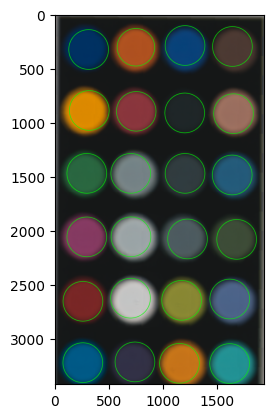

In [45]:
#drawing detected circles on a picture - contours are a bit displaced, so I had to manually find a distance between circle's centers on x and y axes
for (x, y, r) in detected_circles[0, :]:
    cv2.circle(output, (x, y), r, (0, 255, 0), 3) 
plt.imshow(output)

In [46]:
aligned_circles=np.zeros(detected_circles.shape[:], np.uint16)
#deltaX=465, deltaY=580
start_x=[258, 723, 1183, 1643]
row=0
for x in start_x:
    y=3226
    aligned_circles[0, row, :] = [x, y, 180]
    for i in range(5):
        row+=1
        y-=580
        aligned_circles[0, row, :]=[x, y, 180]
        #row+=1
    row+=1

aligned_circles

array([[[ 258, 3226,  180],
        [ 258, 2646,  180],
        [ 258, 2066,  180],
        [ 258, 1486,  180],
        [ 258,  906,  180],
        [ 258,  326,  180],
        [ 723, 3226,  180],
        [ 723, 2646,  180],
        [ 723, 2066,  180],
        [ 723, 1486,  180],
        [ 723,  906,  180],
        [ 723,  326,  180],
        [1183, 3226,  180],
        [1183, 2646,  180],
        [1183, 2066,  180],
        [1183, 1486,  180],
        [1183,  906,  180],
        [1183,  326,  180],
        [1643, 3226,  180],
        [1643, 2646,  180],
        [1643, 2066,  180],
        [1643, 1486,  180],
        [1643,  906,  180],
        [1643,  326,  180]]], dtype=uint16)

In [47]:
colors={}
lines=['A', 'B', 'C', 'D']
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
line_index=0
row=1
rgb_array=np.zeros((25,3))
for i, (x, y, r) in zip(range(1,25), aligned_circles[0, :]):
    Mask = np.zeros_like(gray_img)
    cv2.circle(Mask, (x, y), r, 255, -1)
    mean_color = cv2.mean(output, mask=Mask)[:3]
    colors[str(row)+lines[line_index]] = mean_color
    rgb_array[i,:]=mean_color
    row+=1
    if i%6==0:
        line_index+=1
        row=1
    color = tuple([int(c) for c in mean_color])
np.round(rgb_array).astype(int)

array([[  0,   0,   0],
       [  0,  86, 129],
       [115,  43,  36],
       [126,  62,  92],
       [ 40, 102,  60],
       [207, 136,   1],
       [  1,  52,  90],
       [ 48,  52,  66],
       [188, 193, 185],
       [149, 163, 158],
       [111, 130, 126],
       [130,  58,  57],
       [164,  84,  30],
       [187, 116,  24],
       [130, 134,  49],
       [ 73,  92,  90],
       [ 46,  63,  59],
       [ 30,  42,  38],
       [ 11,  68, 112],
       [ 33, 143, 138],
       [ 72, 100, 128],
       [ 58,  78,  52],
       [ 35,  88, 116],
       [147, 111,  89],
       [ 71,  60,  48]])

In [51]:
rgb_normalized = rgb_array / 255.0
xyz_array_pallete = RGB_to_XYZ(rgb_normalized, colourspace=RGB_COLOURSPACES["sRGB"], observer='2')
xyz_array_pallete

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.21215753,  0.27815572,  0.52130967],
       [ 0.2720232 ,  0.22674303,  0.16444341],
       [ 0.35545009,  0.30418726,  0.38089195],
       [ 0.25067248,  0.3373117 ,  0.27621186],
       [ 0.52609725,  0.55394594,  0.08383501],
       [ 0.13870831,  0.1727051 ,  0.36081802],
       [ 0.19691844,  0.20529182,  0.27325272],
       [ 0.70532748,  0.74986751,  0.79475818],
       [ 0.58091513,  0.62529013,  0.6750825 ],
       [ 0.45151575,  0.49301807,  0.53861373],
       [ 0.33098216,  0.28586737,  0.2504507 ],
       [ 0.40331221,  0.37952926,  0.16453898],
       [ 0.48304301,  0.48868844,  0.1594764 ],
       [ 0.43431861,  0.49977101,  0.25575024],
       [ 0.31130261,  0.3453939 ,  0.38373667],
       [ 0.20468599,  0.23117014,  0.25441234],
       [ 0.1337836 ,  0.15381825,  0.16259352],
       [ 0.19156983,  0.23080107,  0.44968149],
       [ 0.35187547,  0.46693907,  0.58456104],
       [ 0.34696937,  0.37611426,  0.527

In [52]:
#converting xyz values to Lab to find deltaE, but in skimage package there is a tool for converting rgb to Lab in one step
lab_array_palette=XYZ_to_Lab(xyz_array_pallete)
lab_array_palette

array([[  0.        ,   0.        ,   0.        ],
       [ 59.72175195, -23.08238028, -25.89623489],
       [ 54.73526275,  24.61110607,  15.45680032],
       [ 62.01384149,  23.96814911,  -6.40504558],
       [ 64.74862325, -27.40663494,  12.62367949],
       [ 79.2680154 ,  -0.10504761,  79.17637071],
       [ 48.59908656, -15.19931529, -27.01366304],
       [ 52.43031502,   0.90302943,  -8.16106379],
       [ 89.38678803,  -1.57516345,   1.63827051],
       [ 83.19394895,  -3.23680002,   0.49489403],
       [ 75.63870309,  -4.85755624,  -0.16545648],
       [ 60.41515865,  22.39599649,   9.21707328],
       [ 67.98590544,  13.71941654,  38.28210838],
       [ 75.36966068,   5.17908255,  52.11661222],
       [ 76.05520369, -11.6701894 ,  35.32442632],
       [ 65.38846853,  -6.15550029,  -0.93665586],
       [ 55.19266229,  -7.1635634 ,  -0.42993139],
       [ 46.15278818,  -7.80796203,   1.06029153],
       [ 55.15475485, -13.54355243, -26.24910441],
       [ 73.99355223, -28.88018

In [53]:
baseline_xyzs = np.array([[ 0.62796376,  0.66954797,  0.70157933],
       [ 0.07699844,  0.11032342,  0.31207925],
       [ 0.11669049,  0.06505479,  0.02433408],
       [ 0.18279847,  0.11076765,  0.18527583],
       [ 0.08913716,  0.15536722,  0.07609427],
       [ 0.41479657,  0.38877727,  0.01645731],
       [ 0.04415898,  0.03859136,  0.17949228],
       [ 0.05474545,  0.04641139,  0.09665891],
       [ 0.57582764,  0.61206062,  0.64116574],
       [ 0.39869172,  0.43018193,  0.46987916],
       [ 0.25659066,  0.27990131,  0.3175209 ],
       [ 0.16443546,  0.10197745,  0.0727598 ],
       [ 0.25442953,  0.19025099,  0.02532907],
       [ 0.33631593,  0.29735337,  0.02638805],
       [ 0.24259918,  0.30291963,  0.06076411],
       [ 0.12952873,  0.14265612,  0.16536483],
       [ 0.05575264,  0.06215085,  0.07213184],
       [ 0.01861859,  0.02092272,  0.02408814],
       [ 0.07792497,  0.07285405,  0.25557311],
       [ 0.19831074,  0.29247915,  0.37154651],
       [ 0.1710519 ,  0.17073436,  0.32494476],
       [ 0.07666294,  0.09871002,  0.05477747],
       [ 0.11272739,  0.13069904,  0.26013784],
       [ 0.26808943,  0.24519149,  0.16637244],
       [ 0.07649958,  0.0700062 ,  0.04669594]])
baseline_lab=XYZ_to_Lab(baseline_xyzs)

In [54]:
deltas=np.zeros((25,1))
for i in range(25):
    a=baseline_lab[i,:]
    b=lab_array_palette[i, :]
    deltas[i]=delta_E(a, b, method="CIE 1976")
deltas

array([[ 85.53225812],
       [ 22.45848609],
       [ 34.27381407],
       [ 34.18488361],
       [ 26.40320185],
       [ 24.93875314],
       [ 39.32938521],
       [ 30.91791084],
       [  6.92032001],
       [ 11.64470105],
       [ 15.87042962],
       [ 31.84994026],
       [ 33.51995981],
       [ 31.05012834],
       [ 27.5342375 ],
       [ 20.93153432],
       [ 25.50106934],
       [ 30.64174451],
       [ 34.36491914],
       [ 14.51549984],
       [ 23.39161113],
       [ 23.85770338],
       [ 20.9794192 ],
       [ 20.33243091],
       [ 26.10763221]])